In [36]:
!pip install amplpy pyomo -q
!python -m amplpy.modules install coin highs scip gcg -q

In [37]:

from amplpy import modules
import pyomo.environ as pyo
import pandas as pd
import numpy as np
from pyomo.environ import *


import matplotlib.pyplot as plt
import networkx as nx
import requests



# Caso 1

In [38]:
clientes_data = pd.read_csv(r"C:\Users\ACER\OneDrive - Universidad de los Andes\Escritorio\MOS\PROY2_MOS\Proyecto Seneca Libre\case_1_base\Clients.csv")
print(clientes_data.shape)
clientes_data.sample(5)


(24, 5)


,ClientID,LocationID,Product,Longitude,Latitude
14,15,27,17,-74.094295,4.604168
7,8,20,20,-74.172075,4.649417
8,9,21,20,-74.156153,4.606311
19,20,32,15,-74.121867,4.746625
10,11,23,17,-74.178023,4.591594


In [39]:
depositos_data = pd.read_csv(r"C:\Users\ACER\OneDrive - Universidad de los Andes\Escritorio\MOS\PROY2_MOS\Proyecto Seneca Libre\case_1_base\Depots.csv")
print(depositos_data.shape)
depositos_data.sample(5)

(12, 4)


,DepotID,LocationID,Longitude,Latitude
11,12,12,-74.124089,4.579174
2,3,3,-74.038548,4.792926
8,9,9,-74.095472,4.735973
5,6,6,-74.124002,4.650463
0,1,1,-74.081242,4.750212


In [40]:
ubicaciones_data = pd.concat([depositos_data[["LocationID","Longitude", "Latitude"]], clientes_data[["LocationID","Longitude", "Latitude"]]], axis = 0)
print(ubicaciones_data.shape)
ubicaciones_data.sample(15)

(36, 3)


,LocationID,Longitude,Latitude
8,21,-74.156153,4.606311
16,29,-74.124639,4.615869
4,17,-74.164641,4.648464
7,8,-74.109756,4.678961
15,28,-74.111388,4.557321
0,13,-74.098938,4.597954
14,27,-74.094295,4.604168
0,1,-74.081242,4.750212
2,3,-74.038548,4.792926
12,25,-74.096909,4.646217


In [41]:
vehiculos = pd.read_csv(r"C:\Users\ACER\OneDrive - Universidad de los Andes\Escritorio\MOS\PROY2_MOS\Proyecto Seneca Libre\case_1_base\Vehicles.csv")
print(vehiculos.shape)
vehiculos.sample(5)

(12, 3)


,VehicleType,Capacity,Range
6,EV,100.645676,617.343951
7,EV,62.881578,887.542494
1,Gas Car,135.544525,195.690896
10,EV,84.450000,1370.460000
2,Gas Car,114.380319,142.975891


In [42]:
vehiculos_data= pd.read_csv(r"C:\Users\ACER\OneDrive - Universidad de los Andes\Escritorio\MOS\PROY2_MOS\Proyecto Seneca Libre\vehicles_data.csv")
print(vehiculos_data.shape)
vehiculos_data.sample(3)

(3, 9)


,Vehicle,Freight Rate [COP/km],Time Rate [COP/min],Daily Maintenance [COP/day],Recharge/Fuel Cost [COP/(gal or kWh)],Recharge/Fuel Time [min/10 percent charge],Avg. Speed [km/h],Gas Efficiency [km/gal],Electricity Efficency [kWh/km]
0,Gas Car,5000,500,30000,16000.00,0.1,NaN,10.0,NaN
1,Drone,500,500,3000,220.73,2.0,40.0,NaN,0.15
2,Solar EV,4000,500,21000,NaN,NaN,NaN,NaN,0.15


In [43]:
# DataFrame 2 (datos de vehículos)
vehiculos_data = pd.DataFrame({
    'Vehicle': ['Gas Car', 'EV', 'Drone'],
    'Freight Rate [COP/km]': [5000, 4000, 500],
    'Time Rate [COP/min]': [500, 500, 500],
    'Daily Maintenance [COP/day]': [30000, 21000, 3000],
    'Recharge/Fuel Cost [COP/gal or kWh]': [16000, None, 220.73],
    'Recharge/Fuel Time [min/10 percent charge]': [0.1, None, 2.0],
    'Avg. Speed [km/h]': [None, None, 40.0],
    'Gas Efficiency [km/gal]': [10.0, None, None],
    'Electricity Efficiency [kWh/km]': [None, 0.15, 0.15]
})


# Realizar nuevamente el merge entre los DataFrames
vehiculos_info = vehiculos.merge(vehiculos_data, left_on='VehicleType', right_on='Vehicle', how='left')

vehiculos_info.sample(5)

,VehicleType,Capacity,Range,Vehicle,Freight Rate [COP/km],Time Rate [COP/min],Daily Maintenance [COP/day],Recharge/Fuel Cost [COP/gal or kWh],Recharge/Fuel Time [min/10 percent charge],Avg. Speed [km/h],Gas Efficiency [km/gal],Electricity Efficiency [kWh/km]
8,EV,76.553642,1062.849467,EV,4000,500,21000,NaN,NaN,NaN,NaN,0.15
7,EV,62.881578,887.542494,EV,4000,500,21000,NaN,NaN,NaN,NaN,0.15
4,EV,86.986092,1108.512009,EV,4000,500,21000,NaN,NaN,NaN,NaN,0.15
3,Gas Car,157.901108,173.023042,Gas Car,5000,500,30000,16000.0,0.1,NaN,10.0,NaN
5,EV,87.102380,906.854049,EV,4000,500,21000,NaN,NaN,NaN,NaN,0.15


In [44]:
num_clientes = 24
clientes_id = RangeSet(1, num_clientes)

In [45]:
num_vehiculos = 12
vehiculos_r = RangeSet(1, num_vehiculos)

In [46]:
num_tipo_v = 2
tipos_vehiculo = RangeSet(1, num_tipo_v)

In [47]:
num_depositos = 12
deposito_origen = RangeSet(1, num_depositos)  # Definir ciudad de origen


In [48]:
num_ubicaciones = num_clientes + num_depositos
ubicaciones = RangeSet(1, num_ubicaciones)


In [49]:
def distancia(coor1, coor2):
    service = "route"
    version = "v1"
    profile = "driving"
    coordinates = f"{coor1[0]},{coor1[1]};{coor2[0]},{coor2[1]}"
    overview = "false"

    url = f"http://router.project-osrm.org/{service}/{version}/{profile}/{coordinates}?alternatives=false&overview={overview}"

    try:
        response = requests.get(url)
    except:
        return np.random.randint(1, 5)
    
    if response.status_code == 200:
        return float(response.json()["routes"][0]["distance"])/1000
    else:
        return 99999

In [50]:
# from concurrent.futures import ThreadPoolExecutor
# def calcular_costos_distancia(num_ubicaciones, ubicaciones_data, ubicaciones):
#     costos_distancia = np.zeros((num_ubicaciones, num_ubicaciones))
#     coor = [(ubicaciones_data["Longitude"].to_numpy()[i - 1], 
#              ubicaciones_data["Latitude"].to_numpy()[i - 1]) for i in ubicaciones]

#     # Función para calcular la distancia para un par específico
#     def calcular_par_distancia(indices):
#         i, j = indices
#         return i, j, distancia(coor[i], coor[j])

#     # Generar todas las combinaciones de índices
#     indices = [(i, j) for i in range(num_ubicaciones) for j in range(num_ubicaciones)]

#     # Usar ThreadPoolExecutor para calcular distancias en paralelo
#     with ThreadPoolExecutor() as executor:
#         resultados = list(executor.map(calcular_par_distancia, indices))

#     # Rellenar la matriz con los resultados
#     for i, j, dist in resultados:
#         costos_distancia[i, j] = dist

#     return costos_distancia

from concurrent.futures import ThreadPoolExecutor
import numpy as np

def calcular_costos_distancia(num_ubicaciones, ubicaciones_data, ubicaciones):
    costos_distancia = np.zeros((num_ubicaciones, num_ubicaciones))
    coor = [(ubicaciones_data["Longitude"].to_numpy()[i - 1], 
             ubicaciones_data["Latitude"].to_numpy()[i - 1]) for i in ubicaciones]

    # Función para calcular la distancia para un par específico
    def calcular_par_distancia(indices):
        i, j = indices
        dist = distancia(coor[i], coor[j])
        return i, j, dist

    # Generar combinaciones solo para i < j
    indices = [(i, j) for i in range(num_ubicaciones) for j in range(i + 1, num_ubicaciones)]

    # Usar ThreadPoolExecutor para calcular distancias en paralelo
    with ThreadPoolExecutor() as executor:
        resultados = list(executor.map(calcular_par_distancia, indices))

    # Rellenar la matriz con los resultados y aprovechar la simetría
    for i, j, dist in resultados:
        costos_distancia[i, j] = dist
        costos_distancia[j, i] = dist  # Copiar el valor simétrico

    return costos_distancia


In [51]:
costos_distancia = calcular_costos_distancia(num_ubicaciones, ubicaciones_data, ubicaciones)
costos_distancia

array([[0.00000e+00, 3.30616e+01, 9.99990e+04, ..., 2.00000e+00,
        4.00000e+00, 3.00000e+00],
       [3.30616e+01, 0.00000e+00, 3.00000e+00, ..., 3.00000e+00,
        3.00000e+00, 4.00000e+00],
       [9.99990e+04, 3.00000e+00, 0.00000e+00, ..., 4.00000e+00,
        3.00000e+00, 3.00000e+00],
       ...,
       [2.00000e+00, 3.00000e+00, 4.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.00000e+00],
       [4.00000e+00, 3.00000e+00, 3.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.00000e+00],
       [3.00000e+00, 4.00000e+00, 3.00000e+00, ..., 1.00000e+00,
        4.00000e+00, 0.00000e+00]])

In [52]:
def duracion(coor1, coor2):
    service = "route"
    version = "v1"
    profile = "driving"
    coordinates = f"{coor1[0]},{coor1[1]};{coor2[0]},{coor2[1]}"
    overview = "false"

    url = f"http://router.project-osrm.org/{service}/{version}/{profile}/{coordinates}?alternatives=false&overview={overview}"

    try:
        response = requests.get(url)
    except:
        return np.random.randint(1, 5)
    
    if response.status_code == 200:
        return float(response.json()["routes"][0]["duration"])/60
    else:
        return 99999

In [53]:
# from concurrent.futures import ThreadPoolExecutor
# def calcular_costos_duracion(num_ubicaciones, ubicaciones_data, ubicaciones):
#     costos_duracion = np.zeros((num_ubicaciones, num_ubicaciones))
#     coor = [(ubicaciones_data["Longitude"].to_numpy()[i - 1], 
#              ubicaciones_data["Latitude"].to_numpy()[i - 1]) for i in ubicaciones]

#     # Función para calcular la duracion para un par específico
#     def calcular_par_duracion(indices):
#         i, j = indices
#         return i, j, duracion(coor[i], coor[j])

#     # Generar todas las combinaciones de índices
#     indices = [(i, j) for i in range(num_ubicaciones) for j in range(num_ubicaciones)]

#     # Usar ThreadPoolExecutor para calcular duraciones en paralelo
#     with ThreadPoolExecutor() as executor:
#         resultados = list(executor.map(calcular_par_duracion, indices))

#     # Rellenar la matriz con los resultados
#     for i, j, dura in resultados:
#         costos_duracion[i, j] = dura

#     return costos_duracion

from concurrent.futures import ThreadPoolExecutor
def calcular_costos_duracion(num_ubicaciones, ubicaciones_data, ubicaciones):
    costos_duracion = np.zeros((num_ubicaciones, num_ubicaciones))
    coor = [(ubicaciones_data["Longitude"].to_numpy()[i - 1], 
             ubicaciones_data["Latitude"].to_numpy()[i - 1]) for i in ubicaciones]

    # Función para calcular la duracion para un par específico
    def calcular_par_duracion(indices):
        i, j = indices
        return i, j, duracion(coor[i], coor[j])

    # Generar combinaciones solo para i < j
    indices = [(i, j) for i in range(num_ubicaciones) for j in range(i + 1, num_ubicaciones)]

    # Usar ThreadPoolExecutor para calcular duraciones en paralelo
    with ThreadPoolExecutor() as executor:
        resultados = list(executor.map(calcular_par_duracion, indices))

    # Rellenar la matriz con los resultados
    for i, j, dura in resultados:
        costos_duracion[i, j] = dura
        costos_duracion[j, i] = dura   

    return costos_duracion

In [54]:
costos_duracion = calcular_costos_duracion(num_ubicaciones, ubicaciones_data, ubicaciones)
costos_duracion

array([[0.00000000e+00, 1.00000000e+00, 3.00000000e+00, ...,
        2.00000000e+00, 1.00000000e+00, 3.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 4.00000000e+00, ...,
        4.00000000e+00, 2.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.00000000e+00, 0.00000000e+00, ...,
        9.99990000e+04, 9.99990000e+04, 4.47733333e+01],
       ...,
       [2.00000000e+00, 4.00000000e+00, 9.99990000e+04, ...,
        0.00000000e+00, 2.00000000e+00, 1.24733333e+01],
       [1.00000000e+00, 2.00000000e+00, 9.99990000e+04, ...,
        2.00000000e+00, 0.00000000e+00, 2.99583333e+01],
       [3.00000000e+00, 1.00000000e+00, 4.47733333e+01, ...,
        1.24733333e+01, 2.99583333e+01, 0.00000000e+00]])

In [55]:
from pyomo.environ import *
import pandas as pd
import numpy as np

In [56]:
model = pyo.ConcreteModel()

In [57]:
# Eliminar los componentes existentes antes de redefinirlos
if "N" in model.component_map():
    model.del_component("N")
if "C" in model.component_map():
    model.del_component("C")
if "D" in model.component_map():
    model.del_component("D")

In [58]:
model.C = Set(initialize=clientes_data['LocationID'].tolist())  # Clientes
model.D = Set(initialize=depositos_data['LocationID'].tolist())  # Depósitos
vehiculos_info["Vehicle_ID"] = vehiculos_info.index.astype(int)  # Crear un identificador único si no existe
model.V = Set(initialize=vehiculos_info["Vehicle_ID"].tolist())
model.N = Set(initialize=list(model.C) + list(model.D)) # Nodos



In [59]:
vehiculos_info.sample(5)

,VehicleType,Capacity,Range,Vehicle,Freight Rate [COP/km],Time Rate [COP/min],Daily Maintenance [COP/day],Recharge/Fuel Cost [COP/gal or kWh],Recharge/Fuel Time [min/10 percent charge],Avg. Speed [km/h],Gas Efficiency [km/gal],Electricity Efficiency [kWh/km],Vehicle_ID
3,Gas Car,157.901108,173.023042,Gas Car,5000,500,30000,16000.0,0.1,NaN,10.0,NaN,3
2,Gas Car,114.380319,142.975891,Gas Car,5000,500,30000,16000.0,0.1,NaN,10.0,NaN,2
0,Gas Car,131.921140,145.852071,Gas Car,5000,500,30000,16000.0,0.1,NaN,10.0,NaN,0
9,Gas Car,78.600000,133.130000,Gas Car,5000,500,30000,16000.0,0.1,NaN,10.0,NaN,9
1,Gas Car,135.544525,195.690896,Gas Car,5000,500,30000,16000.0,0.1,NaN,10.0,NaN,1


In [60]:
print("Clientes:", model.C.pprint())
print("Depósitos:", model.D.pprint())
print("Nodos (N):", model.N.pprint())
print("Vehículos:", model.V.pprint())


C : Size=1, Index=None, Ordered=Insertion
    Key  : Dimen : Domain : Size : Members
    None :     1 :    Any :   24 : {13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36}
Clientes: None
D : Size=1, Index=None, Ordered=Insertion
    Key  : Dimen : Domain : Size : Members
    None :     1 :    Any :   12 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
Depósitos: None
N : Size=1, Index=None, Ordered=Insertion
    Key  : Dimen : Domain : Size : Members
    None :     1 :    Any :   36 : {13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
Nodos (N): None
V : Size=1, Index=None, Ordered=Insertion
    Key  : Dimen : Domain : Size : Members
    None :     1 :    Any :   12 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}
Vehículos: None


In [61]:
vehiculos_info.sample(10)

,VehicleType,Capacity,Range,Vehicle,Freight Rate [COP/km],Time Rate [COP/min],Daily Maintenance [COP/day],Recharge/Fuel Cost [COP/gal or kWh],Recharge/Fuel Time [min/10 percent charge],Avg. Speed [km/h],Gas Efficiency [km/gal],Electricity Efficiency [kWh/km],Vehicle_ID
9,Gas Car,78.600000,133.130000,Gas Car,5000,500,30000,16000.0,0.1,NaN,10.0,NaN,9
1,Gas Car,135.544525,195.690896,Gas Car,5000,500,30000,16000.0,0.1,NaN,10.0,NaN,1
2,Gas Car,114.380319,142.975891,Gas Car,5000,500,30000,16000.0,0.1,NaN,10.0,NaN,2
5,EV,87.102380,906.854049,EV,4000,500,21000,NaN,NaN,NaN,NaN,0.15,5
3,Gas Car,157.901108,173.023042,Gas Car,5000,500,30000,16000.0,0.1,NaN,10.0,NaN,3
0,Gas Car,131.921140,145.852071,Gas Car,5000,500,30000,16000.0,0.1,NaN,10.0,NaN,0
4,EV,86.986092,1108.512009,EV,4000,500,21000,NaN,NaN,NaN,NaN,0.15,4
11,Gas Car,131.920000,145.850000,Gas Car,5000,500,30000,16000.0,0.1,NaN,10.0,NaN,11
8,EV,76.553642,1062.849467,EV,4000,500,21000,NaN,NaN,NaN,NaN,0.15,8
7,EV,62.881578,887.542494,EV,4000,500,21000,NaN,NaN,NaN,NaN,0.15,7


In [ ]:
# Parámetros ajustados
model.capacity = pyo.Param(model.V, initialize=dict(zip(vehiculos_info["Vehicle_ID"], vehiculos_info["Capacity"])))
model.range = pyo.Param(model.V, initialize=dict(zip(vehiculos_info["Vehicle_ID"], vehiculos_info["Range"])))
model.cost_per_km = pyo.Param(model.V, initialize=dict(zip(vehiculos_info["Vehicle_ID"], vehiculos_info["Freight Rate [COP/km]"])))
model.cost_per_min = pyo.Param(model.V, initialize=dict(zip(vehiculos_info["Vehicle_ID"], vehiculos_info["Time Rate [COP/min]"])))
# Parámetro de costo por unidad de carga transportada (por ejemplo, COP por kg)
model.cost_per_load = pyo.Param(initialize=100)


# Demanda por cliente
model.demand = pyo.Param(model.C, initialize=dict(zip(clientes_data["LocationID"], clientes_data["Product"])))

# Costos por distancia
dist_dict = {
    (ubicaciones_data.iloc[i]["LocationID"], ubicaciones_data.iloc[j]["LocationID"]): costos_distancia[i, j]
    for i in range(num_ubicaciones)
    for j in range(num_ubicaciones)
    if i != j
}

model.distances = pyo.Param(model.N, model.N, initialize=dist_dict, default=0)

# Costos por duración
dura_dict = {
    (ubicaciones_data.iloc[i]["LocationID"], ubicaciones_data.iloc[j]["LocationID"]): costos_duracion[i, j]
    for i in range(num_ubicaciones)
    for j in range(num_ubicaciones)
    if i != j
}

model.durations = pyo.Param(model.N, model.N, initialize=dura_dict, default=0)

# Costo de mantenimiento diario de cada vehículo
model.maintenance_cost = pyo.Param(model.V, initialize=dict(zip(vehiculos_info["Vehicle_ID"], vehiculos_info["Daily Maintenance [COP/day]"])))


'pyomo.core.base.param.IndexedParam'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.param.IndexedParam'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.param.IndexedParam'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.param.IndexedParam'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.param.IndexedParam'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.param.IndexedParam'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
(type=<class 'pyomo.core.base.param.IndexedParam'>) on block unknown with a
new Component (type=<class 'pyomo.core.base.param.IndexedParam'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_compon

In [ ]:
del model.x
del model.u
del model.v_use
del model.carga

In [ ]:
# Variables binarias para rutas
model.x = pyo.Var(model.N, model.N, model.V, domain=pyo.Binary)

# Variable auxiliar para el orden de visita
model.u = pyo.Var(model.V, model.C, within=pyo.NonNegativeIntegers)

# Varaible auxiliar para saber si un vehículo es utilizado
model.v_use = pyo.Var(model.V, within=pyo.Binary)

# Variable que controla la carga que lleva cada vehiculo
model.carga = pyo.Var(model.N, model.N, model.V, domain=pyo.NonNegativeReals)


In [76]:
if "objective" in model.component_map():
    model.del_component("objective")

In [ ]:
# Función objetivo ajustada
def objective_rule(model):
    # Costo por distancia recorrida
    cost_distance = sum(model.cost_per_km[v] * model.distances[i, j] * model.x[i, j, v]
                        for v in model.V for i in model.N for j in model.N if i != j)
    
    # Costo por duración del trayecto
    cost_duration = sum(model.cost_per_min[v] * model.durations[i, j] * model.x[i, j, v]
                        for v in model.V for i in model.N for j in model.N if i != j)
    
    # Costos de mantenimiento
    cost_maintenance = sum(model.maintenance_cost[v] * model.v_use[v] for v in model.V)       
    # Costos de carga
    cost_load = sum(model.cost_per_load* model.capacity[v] * model.v_use[v] for v in model.V)
    # Suma total de costos
    return cost_distance + cost_duration + cost_maintenance + cost_load

model.objective = pyo.Objective(rule=objective_rule, sense=pyo.minimize)

In [ ]:
# Eliminar restricciones del modelo
del model.visit_once
del model.flow_conservation
del model.satisfy_demand
del model.vehicle_capacity
del model.vehicle_capacity_01
del model.subtour_elimination
del model.return_to_depot
del model.depot_salida
del model.vehicle_used
del model.vehicle_range

NameError: name 'model' is not defined

In [ ]:
#RESTRICCIONES
#Quitar carga load y arreglar la restriccion de capacidad de los vehiculos
# Restricciones de vista una vez
def visit_once_rule(model, i):
    return sum(model.x[i, j, v] for v in model.V for j in model.N if i != j) == 1

model.visit_once = pyo.Constraint(model.C, rule=visit_once_rule)

#Restricción conservación de flujo
def flow_conservation_rule(model, v, i):
    return sum(model.x[i, j, v] for j in model.N if i != j) == sum(model.x[j, i, v] for j in model.N if i != j)

model.flow_conservation = pyo.Constraint(model.V, model.N, rule=flow_conservation_rule)


# Restricción para habilitar la variable auxiliar v_use
def vehicle_used_rule(model, v):
    return model.v_use[v]*len(model.N) >= sum(model.x[i, j, v] for i in model.N for j in model.N if i != j)
model.vehicle_used = pyo.Constraint(model.V, rule=vehicle_used_rule)

#Restrcción de rango
def vehicle_range_rule(model, v):
    return sum(model.distances[i, j]*model.x[i, j, v] for i in model.N for j in model.N if i != j) <= model.range[v]
model.vehicle_range = pyo.Constraint(model.V, rule=vehicle_range_rule)

#Restricción salida de deposito
def depot_salida_rule(model, v):
    return sum(model.x[d, j, v] for d in model.D for j in model.C) == 1
model.depot_salida = pyo.Constraint(model.V, rule=depot_salida_rule)


# Restricción para garantizar que los vehículos regresen al depósito de salida
def return_to_depot_rule(model, v, d):
    return sum(model.x[d, j, v] for j in model.N if j != d) == sum(model.x[j, d, v] for j in model.N if j != d)

model.return_to_depot = pyo.Constraint(model.V, model.D, rule=return_to_depot_rule)

# Restricción de capacidad de los vehículos
def vehicle_capacity_rule(model, v):
    return sum(model.demand[i]*model.x[i, j, v] for i in model.C for j in model.N if i != j) <= model.capacity[v]

model.vehicle_capacity_01 = pyo.Constraint(model.V, rule=vehicle_capacity_rule)

# Restricción de capacidad de los vehículos
def vehicle_capacity_rule(model, i, j, v):
    return model.carga[i, j, v] <= model.capacity[v] * model.x[i, j, v]
model.vehicle_capacity = pyo.Constraint(model.N, model.N, model.V, rule=vehicle_capacity_rule)

# Restricción para satisfacer la demanda de cada cliente
def satisfy_demand_rule(model, i):
    return sum(model.carga[i, j, v] for j in model.N for v in model.V if j != i) == model.demand[i]
model.satisfy_demand = pyo.Constraint(model.C, rule=satisfy_demand_rule)


# Restricción de subtour elimination (MTZ)
def subtour_elimination_rule(model, v, i, j):
    if i != j and i not in model.D and j not in model.D:  # Aplica a nodos diferentes
        return model.u[v, i] - model.u[v, j] + len(model.C) * model.x[i, j, v] <= len(model.C) - 1
    else:
        return pyo.Constraint.Skip

model.subtour_elimination = pyo.Constraint(model.V, model.C, model.C, rule=subtour_elimination_rule)

def subtour_elimination_rule_v2(model, v, i, j):
    # No se evalúa para depósitos, solo entre clientes
    if i != j and i not in model.D and j not in model.D:
        return model.x[i, j, v] + model.x[j, i, v] <= 1
    else:
        return pyo.Constraint.Skip

#model.subtour_elimination = pyo.Constraint(model.V, model.C, model.C, rule=subtour_elimination_rule_v2)








In [103]:
class ModelSolver:
    def __init__(self, model):
        self.model = model

    def solve_model(self):
        # Definir el solver
        solver_name = "highs"  # Asegúrate de tener este solver instalado y disponible
        solver = pyo.SolverFactory(solver_name+"nl", executable=modules.find(solver_name), solver_io="nl")

        # Configurar opciones avanzadas del solver
        solver.options['parallel'] = 'on'  # Habilitar paralelismo
        solver.options['time_limit'] = 3600  # Límite de tiempo (1 hora)
        solver.options['presolve'] = 'on'  # Habilitar preprocesamiento
        solver.options['mip_rel_gap'] = 0.01  # Gap relativo del 1% (para MIP)
        solver.options['simplex_strategy'] = 1  # Estrategia del método simplex (dual simplex)
        #solver.options['simplex_max_concurrency'] = 8  # Máxima concurrencia para simplex
        #solver.options['mip_min_logging_interval'] = 10  # Intervalo mínimo de logs (10s)
        #solver.options['mip_heuristic_effort'] = 0.2  # Esfuerzo heurístico en 20%

        # Resolver el modelo
        result = solver.solve(self.model, tee=True)
        print(result.solver.status)
        print(result.solver.termination_condition)

        # Verificar el estado de la solución
        if result.solver.termination_condition == pyo.TerminationCondition.optimal:
            print("Optimal solution found.")
        elif result.solver.termination_condition == pyo.TerminationCondition.maxTimeLimit:
            print("Time limit reached, solution may be suboptimal.")
        else:
            print(f"Solver terminated with condition: {result.solver.termination_condition}")

        # Mostrar el resultado
        print(result)


In [ ]:
solver = ModelSolver(model)
solver.solve_model()

HiGHS 1.8.1:   alg:parallel = on
  lim:time = 3600
  pre:solve = on
  mip:gap = 0.01
  alg:simplex = 1


In [33]:
#solver_name="highs"

In [34]:
#opt = pyo.SolverFactory(solver_name+"nl", executable=modules.find(solver_name), solver_io="nl")
#results = opt.solve(model, tee=True)
#model.display()

Rutas seleccionadas para el viajero 0: []
Rutas seleccionadas para el viajero 1: []
Rutas seleccionadas para el viajero 2: []
Rutas seleccionadas para el viajero 3: []
Rutas seleccionadas para el viajero 4: []
Rutas seleccionadas para el viajero 5: []
Rutas seleccionadas para el viajero 6: []
Rutas seleccionadas para el viajero 7: []
Rutas seleccionadas para el viajero 8: []
Rutas seleccionadas para el viajero 9: []
Rutas seleccionadas para el viajero 10: []
Rutas seleccionadas para el viajero 11: []


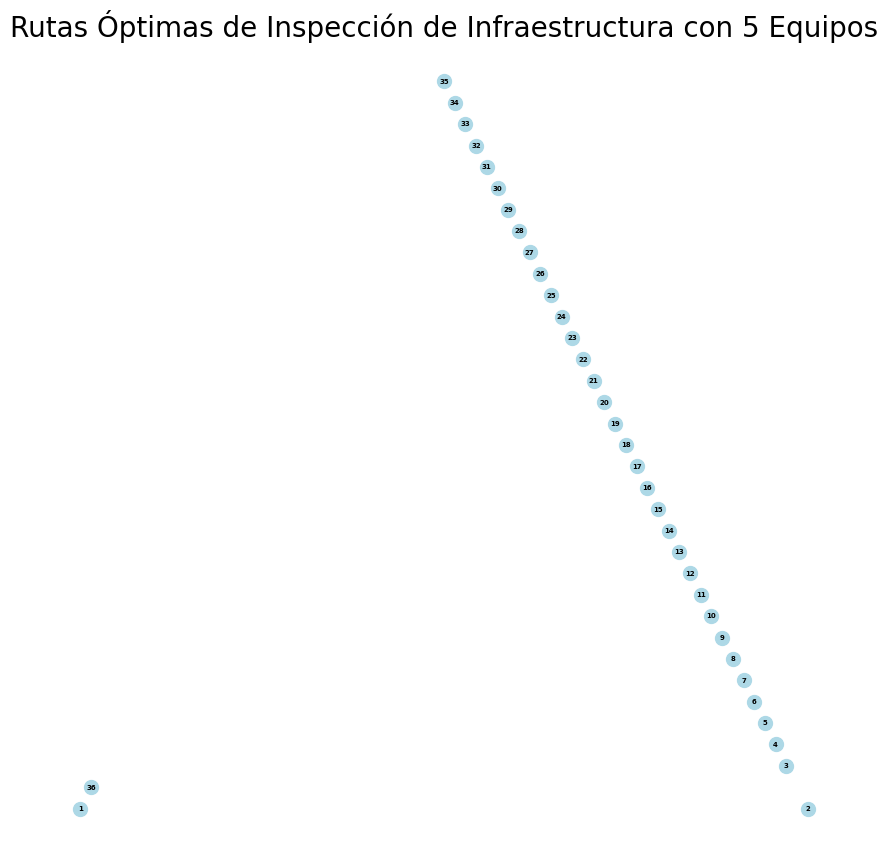

{1: array([-1.        , -0.34613147]),
 2: array([ 0.42408377, -0.34613147]),
 3: array([ 0.38219895, -0.30424666]),
 4: array([ 0.36125654, -0.28330425]),
 5: array([ 0.34031414, -0.26236184]),
 6: array([ 0.31937173, -0.24141943]),
 7: array([ 0.29842932, -0.22047702]),
 8: array([ 0.27748691, -0.19953461]),
 9: array([ 0.2565445, -0.1785922]),
 10: array([ 0.23560209, -0.1576498 ]),
 11: array([ 0.21465969, -0.13670739]),
 12: array([ 0.19371728, -0.11576498]),
 13: array([ 0.17277487, -0.09482257]),
 14: array([ 0.15183246, -0.07388016]),
 15: array([ 0.13089005, -0.05293775]),
 16: array([ 0.10994764, -0.03199535]),
 17: array([ 0.08900524, -0.01105294]),
 18: array([0.06806283, 0.00988947]),
 19: array([0.04712042, 0.03083188]),
 20: array([0.02617801, 0.05177429]),
 21: array([0.0052356, 0.0727167]),
 22: array([-0.01570681,  0.0936591 ]),
 23: array([-0.03664921,  0.11460151]),
 24: array([-0.05759162,  0.13554392]),
 25: array([-0.07853403,  0.15648633]),
 26: array([-0.099476

In [35]:

# Extraer las rutas seleccionadas
selected_routes = []
for k in model.V:
    routes_for_k = [(i, j) for i in ubicaciones for j in ubicaciones if i != j and model.x[i, j, k].value == 1]
    print(f"Rutas seleccionadas para el viajero {k}: {routes_for_k}")
    selected_routes.append(routes_for_k)

# Crear el grafo usando NetworkX
G = nx.DiGraph()

# Añadir ubicaciones
for i in ubicaciones:
    G.add_node(i)

for k in range(num_vehiculos):
    for route in selected_routes[k]:
        i, j = route
        G.add_edge(i, j, weight=f"{costos_distancia[i-1,j-1]:.2f}",color=k)

# Dibujar el grafo
edges = G.edges()
edge_colors = [G[u][v]['color'] for u, v in edges]
pos = nx.planar_layout(G)  # Usar un layout circular para una visualización clara
labels = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=100, font_size=5, font_weight='bold', arrowsize=20, edge_color=edge_colors)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("Rutas Óptimas de Inspección de Infraestructura con 5 Equipos", size=20)
plt.show()
pos